## Loading MNIST dataset
The MNIST dataset (a classic in the Machine Learning community) has been around almost as long as the field itself and has been intensively studied. 

It’s a set of 60,000 training images, plus 10,000 test images, assembled by the National Institute of Standards and Technology (the NIST in MNIST) in the 1980s. 


In [1]:
# Loading the MNIST dataset in Keras
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Having a look at Training Data
print(train_images.shape)
print(len(train_labels))
print(train_labels)

(60000, 28, 28)
60000
[5 0 4 ... 5 6 8]


In [2]:
# Having a look at Test Data
print(test_images.shape)
print(len(test_labels))
print(test_labels)

(10000, 28, 28)
10000
[7 2 1 ... 4 5 6]


In [3]:
train_images[4]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

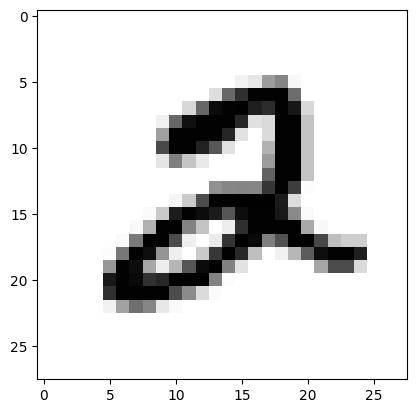

In [4]:
# Displaying the 5th digit in training dataset
import matplotlib.pyplot as plt
digit = train_images[5]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

## 1. Densely connected NN

In [5]:
# NN Architecture
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
 layers.Dense(512, activation="relu"),
 layers.Dense(10, activation="softmax")
])

In [6]:
# Compilation step
model.compile(optimizer="rmsprop",
 loss="sparse_categorical_crossentropy",
 metrics=["accuracy"])

In [7]:
# Preparing the image data
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [8]:
# Fitting the model
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 5ms/step - loss: 0.2647 - accuracy: 0.9237
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.1076 - accuracy: 0.9689
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0704 - accuracy: 0.9792
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0513 - accuracy: 0.9846
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0388 - accuracy: 0.9885


In [9]:
# Using the model to make predictions
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 66ms/step


array([1.5251047e-07, 3.8998760e-09, 2.2743757e-06, 7.7926947e-05,
       2.2350136e-12, 3.7572349e-08, 3.7400587e-13, 9.9991882e-01,
       1.0346750e-07, 7.3197418e-07], dtype=float32)

In [10]:
predictions[0].argmax() 

7

In [11]:
predictions[0][7] 

0.9999188

In [12]:
test_labels[0] 

7

In [13]:
# Evaluating the model on new data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0710 - accuracy: 0.9797
test_acc: 0.9797000288963318


## 2. Small ConvNet

In [14]:
from tensorflow import keras
from tensorflow.keras import layers

# Instantiating a small ConvNet 
inputs = keras.Input(shape=(28, 28, 1))   # input tensors shape: (image_height, image_width, image_channels)
                                          # image_channels = depth = 1 in this case (levels of gray)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)      #  flatten the 3D outputs to 1D with a Flatten layer before adding the Dense layers
outputs = layers.Dense(10, activation="softmax")(x)     # the last layer has 10 outputs and a softmax activation.

model = keras.Model(inputs=inputs, outputs=outputs)

In [15]:
# Displaying the model’s summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

The output of every Conv2D and MaxPooling2D layer is a rank-3 tensor of shape (height, width, channels). The width and height dimensions tend to shrink as you go deeper in the model. 

The number of channels is controlled by the first argument passed to the Conv2D layers (32, 64, or 128).

In [16]:
# Training the convnet on MNIST images
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
 
# Preparing the image data the same way as above
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 7s 4ms/step - loss: 0.1651 - accuracy: 0.9486
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0461 - accuracy: 0.9860
Epoch 3/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0318 - accuracy: 0.9902
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0242 - accuracy: 0.9922
Epoch 5/5
938/938 [==============================] - 3s 4ms/step - loss: 0.0186 - accuracy: 0.9943


In [17]:
# Evaluating the convnet
test_loss, test_acc = model.evaluate(test_images, test_labels) 
print(f"Test accuracy: {test_acc:.3f}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0301 - accuracy: 0.9905
Test accuracy: 0.990
